11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


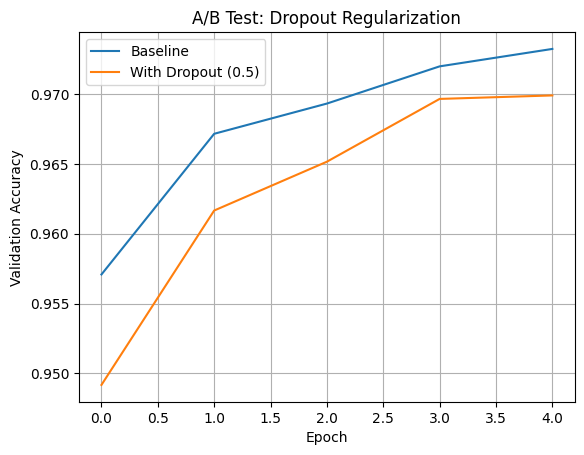

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Define models
def build_model(use_dropout=False):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5) if use_dropout else layers.Activation('linear'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train baseline model
baseline_model = build_model(use_dropout=False)
history_baseline = baseline_model.fit(x_train, y_train, validation_split=0.2, epochs=5, verbose=0)

# Train dropout model
dropout_model = build_model(use_dropout=True)
history_dropout = dropout_model.fit(x_train, y_train, validation_split=0.2, epochs=5, verbose=0)

# Plot validation accuracy
plt.plot(history_baseline.history['val_accuracy'], label='Baseline')
plt.plot(history_dropout.history['val_accuracy'], label='With Dropout (0.5)')
plt.title("A/B Test: Dropout Regularization")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Standard vs. Monte Carlo Dropout with A/B Test

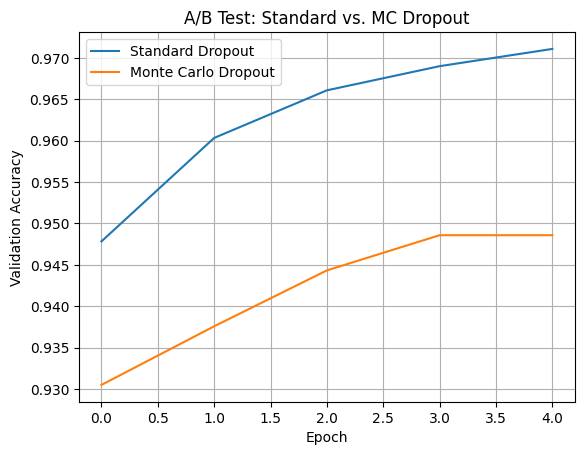

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load and preprocess
(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# MC Dropout Layer (forces dropout at inference too)
class MCDropout(layers.Dropout):
    def call(self, inputs, training=None):
        return super().call(inputs, training=True)

# Model builder
def build_model(mc=False):
    dropout_layer = MCDropout(0.5) if mc else layers.Dropout(0.5)
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(128, activation='relu'),
        dropout_layer,
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Train standard dropout
std_model = build_model(mc=False)
std_history = std_model.fit(x_train, y_train, validation_split=0.2, epochs=5, verbose=0)

# Train MC dropout
mc_model = build_model(mc=True)
mc_history = mc_model.fit(x_train, y_train, validation_split=0.2, epochs=5, verbose=0)

# Plot A/B validation accuracy
plt.plot(std_history.history['val_accuracy'], label='Standard Dropout')
plt.plot(mc_history.history['val_accuracy'], label='Monte Carlo Dropout')
plt.title("A/B Test: Standard vs. MC Dropout")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()